# **EDA**

In [27]:
import pandas as pd

url = "https://raw.githubusercontent.com/Anujgour22/upi-fraud-detection/refs/heads/main/synthetic_upi.csv"
df = pd.read_csv(url)

df.head()


,transaction_id,timestamp,amount,sender_id_hash,receiver_id_hash,sender_account_age_days,device_type,ip_region,merchant_category,is_recurring,txn_channel,txn_status,num_prev_txns_24h,avg_amount_30d,hour,weekday,is_night,is_weekend,is_fraud
0,3c6dacdd-cd38-464f-b153-832753d41db7,2025-07-17 10:59:21.145141,1293.82,a1a780c0-815a-4b76-a0db-2c945f8dce01,9b65cda2-b126-4ed7-82fd-6946a4bb8336,433,Tablet,Jasonburgh,Bills,0,Paytm,Success,4,866.89,10,3,0,0,0
1,980f963f-e889-40d6-b7cf-e3f491af5982,2025-06-10 03:02:13.930708,1732.36,a78962ec-9625-4065-9d5b-9a1e1aaf647f,e97167de-fc80-4429-a083-a6768941a444,850,Tablet,Nealton,Others,1,PhonePe,Reversed,9,2778.49,3,1,1,0,0
2,0ac4de85-4a5b-4aff-a57f-7595cdfb4db9,2025-06-05 19:08:46.140739,1740.85,65001423-faeb-4d19-a550-8ea26133a34d,c5e78b23-f461-4f09-985a-befbd1812f77,766,Web,Stephanieland,Others,1,GooglePay,Success,15,1896.01,19,3,0,0,0
3,38c3a136-fe61-4fb8-a6b0-98fece02c948,2025-07-26 23:13:57.350060,1817.43,dd11827e-4973-42c4-a11a-63b2fc4103e3,146bd244-0597-43bd-9b24-57962cea66d9,640,Mobile,Christinefort,Others,0,PhonePe,Success,14,2288.38,23,5,1,1,0
4,afd64204-c087-421f-94c5-776f46a853ff,2025-07-31 01:05:39.084937,4320.90,0c22862c-a063-45a4-951e-4f0006a169b6,0693fd2c-39df-4918-b381-e74a88479a89,984,Mobile,New David,Shopping,1,PhonePe,Success,10,2764.80,1,3,1,0,0


In [28]:
# Shape of dataset (rows, columns)
print("Shape:", df.shape)

# Data types and missing values
print("\nInfo:")
print(df.info())

# Check missing values per column
print("\nMissing values per column:")
print(df.isnull().sum())


Shape: (50000, 19)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           50000 non-null  object 
 1   timestamp                50000 non-null  object 
 2   amount                   50000 non-null  float64
 3   sender_id_hash           50000 non-null  object 
 4   receiver_id_hash         50000 non-null  object 
 5   sender_account_age_days  50000 non-null  int64  
 6   device_type              50000 non-null  object 
 7   ip_region                50000 non-null  object 
 8   merchant_category        50000 non-null  object 
 9   is_recurring             50000 non-null  int64  
 10  txn_channel              50000 non-null  object 
 11  txn_status               50000 non-null  object 
 12  num_prev_txns_24h        50000 non-null  int64  
 13  avg_amount_30d           50000 non-null  float64
 

In [29]:
print("\nFraud vs Legit transactions:")
print(df['is_fraud'].value_counts())

print("\nFraud percentage:")
print((df['is_fraud'].value_counts(normalize=True) * 100).round(2))



Fraud vs Legit transactions:
is_fraud
0    49700
1      300
Name: count, dtype: int64

Fraud percentage:
is_fraud
0    99.4
1     0.6
Name: proportion, dtype: float64


In [30]:
# Summary stats for numeric columns
df.describe()


,amount,sender_account_age_days,is_recurring,num_prev_txns_24h,avg_amount_30d,hour,weekday,is_night,is_weekend,is_fraud
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,3549.693901,1066.100600,0.499080,7.638180,1741.790634,11.521100,3.007200,0.333820,0.287080,0.006000
std,7914.583142,537.799229,0.500004,5.003771,723.263487,6.931603,2.000347,0.471581,0.452404,0.077228
min,37.020000,1.000000,0.000000,0.000000,206.180000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1067.090000,605.000000,0.000000,3.000000,1112.045000,6.000000,1.000000,0.000000,0.000000,0.000000
50%,1727.645000,1060.000000,0.000000,8.000000,1741.465000,12.000000,3.000000,0.000000,0.000000,0.000000
75%,2677.472500,1531.000000,1.000000,12.000000,2367.297500,18.000000,5.000000,1.000000,1.000000,0.000000
max,59996.100000,2000.000000,1.000000,50.000000,2999.930000,23.000000,6.000000,1.000000,1.000000,1.000000


In [31]:
!pip install seaborn matplotlib

import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for cleaner plots
sns.set(style="whitegrid")


In [32]:
import os

# Make plots folder for Day 3
os.makedirs("plots/day3", exist_ok=True)

# Function to save plots
def save_plot(filename):
    path = f"plots/day3/{filename}"
    plt.savefig(path, bbox_inches='tight')
    print(f"📁 Saved: {path}")


Dataset Shape: (50259, 19)
                         transaction_id                  timestamp   amount  \
0  a06d5ce9-8abe-4c42-afc4-17dc92320bcb 2025-05-13 00:13:41.514151  1116.66   
1  00ecefe0-c6b0-42b6-b8e6-00acce210234 2025-05-13 00:16:03.581175   352.75   
2  2c450265-0c94-42cb-b607-81df72055aee 2025-05-13 00:36:46.073936   472.38   
3  0d45dd52-4133-4b24-98d2-b893373a0963 2025-05-13 00:45:37.634214   221.99   
4  bde5bed2-2ac4-4aa7-955b-2fd2c4e66d09 2025-05-13 00:53:12.655335   207.36   

  sender_id_hash                      receiver_id_hash  \
0      user_3240  450d5049-b5d4-459a-8998-bb195844e733   
1      user_3445  52240b17-de97-41fd-b2e9-1883374fbe54   
2      user_1997  a01ecd3d-df1b-4112-bb0a-3aa03369422a   
3      user_3624  a4751476-1c68-426c-b8ff-5d2d094ff31f   
4       user_728  b50b2226-587a-436e-ab37-fa1019f6b74e   

   sender_account_age_days device_type    ip_region merchant_category  \
0                      745         Web  Millermouth     Entertainment   
1  

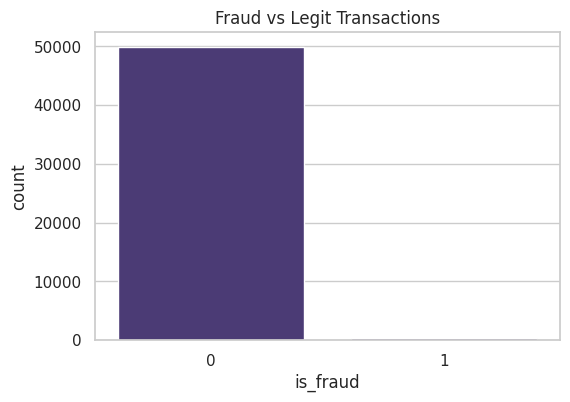

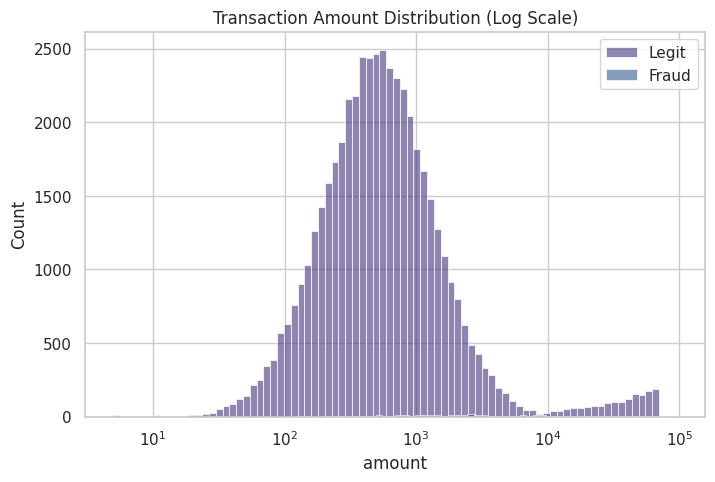

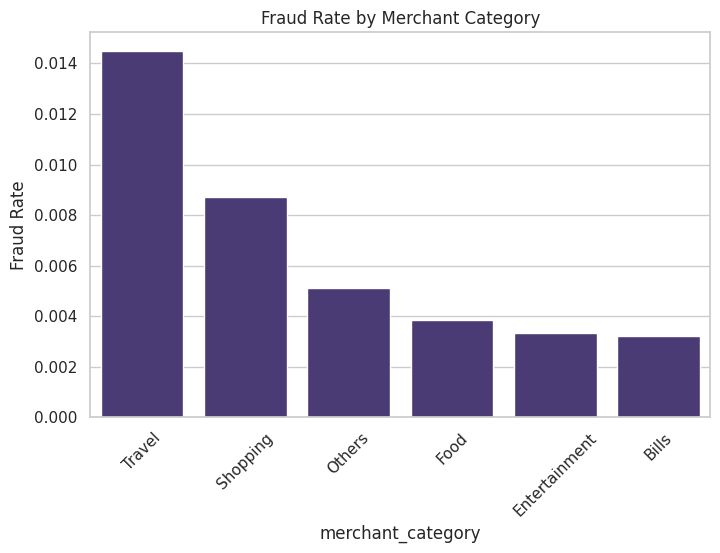

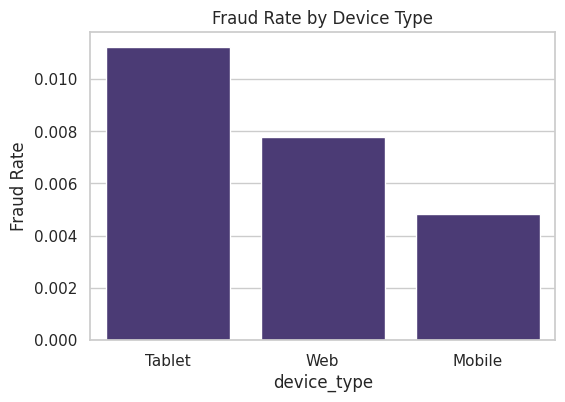

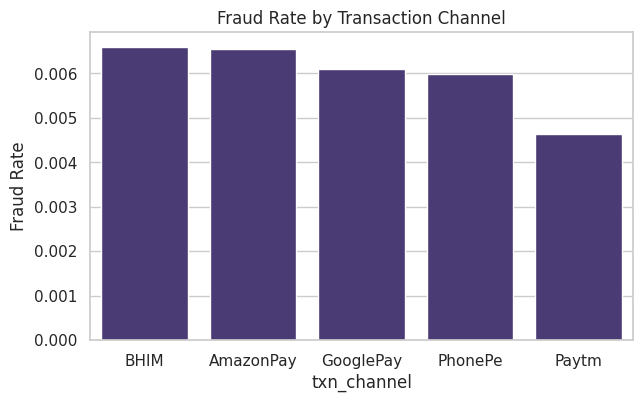

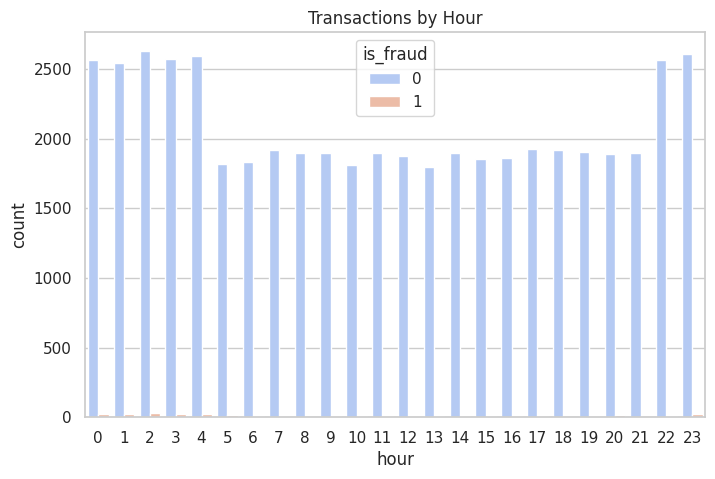

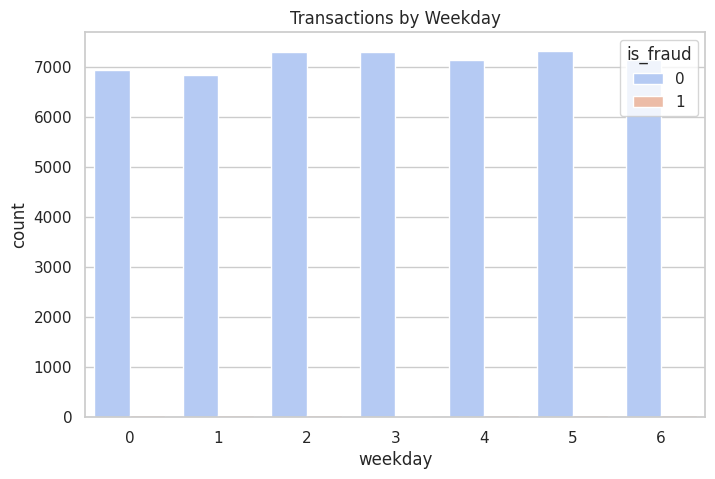

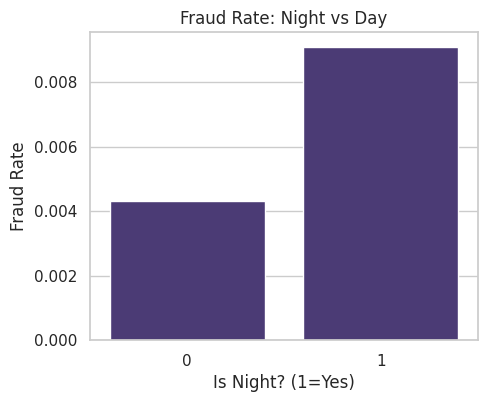

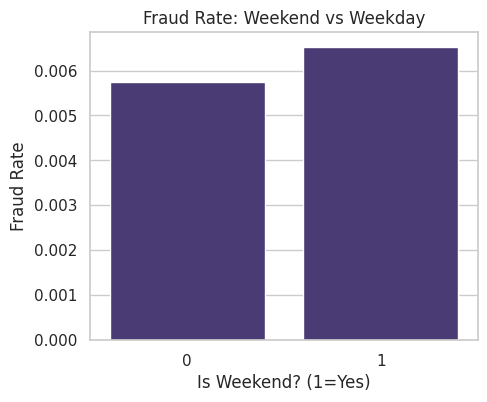

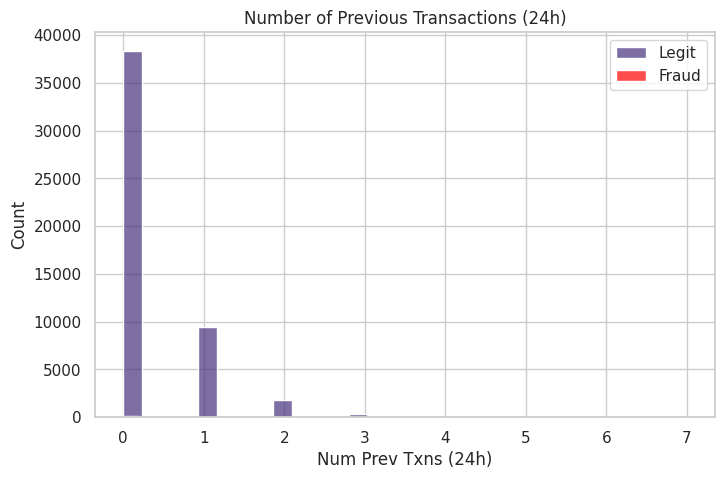

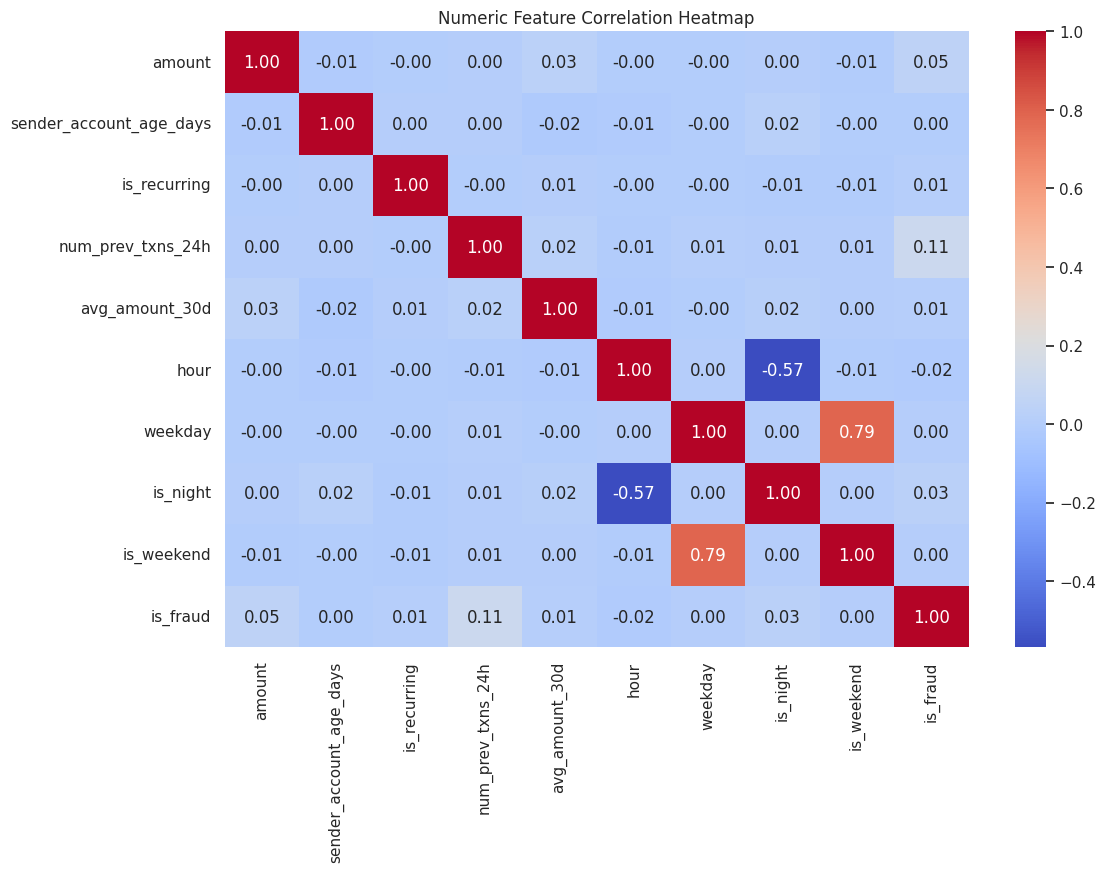

In [33]:
# Plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ---------- Settings ----------
sns.set(style="whitegrid", palette="viridis")
os.makedirs("plots", exist_ok=True)

# ---------- Load Dataset ----------
df = pd.read_csv("data/synthetic_upi.csv", parse_dates=["timestamp"])
print(f"Dataset Shape: {df.shape}")
print(df.head())

# ---------- 1. Fraud vs Legit Counts ----------
plt.figure(figsize=(6,4))
sns.countplot(x='is_fraud', data=df)
plt.title("Fraud vs Legit Transactions")
plt.savefig("plots/fraud_vs_legit.png", dpi=300)
plt.show()

# ---------- 2. Amount Distribution (log scale) ----------
plt.figure(figsize=(8,5))
plt.xscale('log')
sns.histplot(df[df['is_fraud']==0]['amount'], bins=80, label='Legit', alpha=0.6)
sns.histplot(df[df['is_fraud']==1]['amount'], bins=80, label='Fraud', alpha=0.6)
plt.legend()
plt.title("Transaction Amount Distribution (Log Scale)")
plt.savefig("plots/amount_distribution_log.png", dpi=300)
plt.show()

# ---------- 3. Fraud Rate by Merchant Category ----------
fraud_by_cat = (df.groupby('merchant_category')['is_fraud'].mean()).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=fraud_by_cat.index, y=fraud_by_cat.values)
plt.title("Fraud Rate by Merchant Category")
plt.ylabel("Fraud Rate")
plt.xticks(rotation=45)
plt.savefig("plots/fraud_rate_by_merchant.png", dpi=300)
plt.show()

# ---------- 4. Fraud Rate by Device Type ----------
fraud_by_device = df.groupby('device_type')['is_fraud'].mean().sort_values(ascending=False)
plt.figure(figsize=(6,4))
sns.barplot(x=fraud_by_device.index, y=fraud_by_device.values)
plt.title("Fraud Rate by Device Type")
plt.ylabel("Fraud Rate")
plt.savefig("plots/fraud_rate_by_device.png", dpi=300)
plt.show()

# ---------- 5. Fraud Rate by Transaction Channel ----------
fraud_by_channel = df.groupby('txn_channel')['is_fraud'].mean().sort_values(ascending=False)
plt.figure(figsize=(7,4))
sns.barplot(x=fraud_by_channel.index, y=fraud_by_channel.values)
plt.title("Fraud Rate by Transaction Channel")
plt.ylabel("Fraud Rate")
plt.savefig("plots/fraud_rate_by_channel.png", dpi=300)
plt.show()

# ---------- 6. Transactions by Hour (Fraud vs Legit) ----------
plt.figure(figsize=(8,5))
sns.countplot(x='hour', hue='is_fraud', data=df, palette='coolwarm')
plt.title("Transactions by Hour")
plt.savefig("plots/transactions_by_hour.png", dpi=300)
plt.show()

# ---------- 7. Transactions by Weekday ----------
plt.figure(figsize=(8,5))
sns.countplot(x='weekday', hue='is_fraud', data=df, palette='coolwarm')
plt.title("Transactions by Weekday")
plt.savefig("plots/transactions_by_weekday.png", dpi=300)
plt.show()

# ---------- 8. Fraud Rate by Night/Day ----------
fraud_by_night = df.groupby('is_night')['is_fraud'].mean()
plt.figure(figsize=(5,4))
sns.barplot(x=fraud_by_night.index, y=fraud_by_night.values)
plt.title("Fraud Rate: Night vs Day")
plt.xlabel("Is Night? (1=Yes)")
plt.ylabel("Fraud Rate")
plt.savefig("plots/fraud_rate_night.png", dpi=300)
plt.show()

# ---------- 9. Fraud Rate by Weekend/Weekday ----------
fraud_by_weekend = df.groupby('is_weekend')['is_fraud'].mean()
plt.figure(figsize=(5,4))
sns.barplot(x=fraud_by_weekend.index, y=fraud_by_weekend.values)
plt.title("Fraud Rate: Weekend vs Weekday")
plt.xlabel("Is Weekend? (1=Yes)")
plt.ylabel("Fraud Rate")
plt.savefig("plots/fraud_rate_weekend.png", dpi=300)
plt.show()

# ---------- 10. Num Previous Transactions (24h) ----------
plt.figure(figsize=(8,5))
sns.histplot(df[df['is_fraud']==0]['num_prev_txns_24h'], bins=30, label="Legit", alpha=0.7)
sns.histplot(df[df['is_fraud']==1]['num_prev_txns_24h'], bins=30, label="Fraud", alpha=0.7, color="red")
plt.title("Number of Previous Transactions (24h)")
plt.xlabel("Num Prev Txns (24h)")
plt.ylabel("Count")
plt.legend()
plt.savefig("plots/num_prev_txns_24h.png", dpi=300)
plt.show()

# ---------- 11. Correlation Heatmap ----------
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Numeric Feature Correlation Heatmap")
plt.savefig("plots/correlation_heatmap.png", dpi=300)
plt.show()


📁 Saved: plots/day3/fraud_vs_legit.png


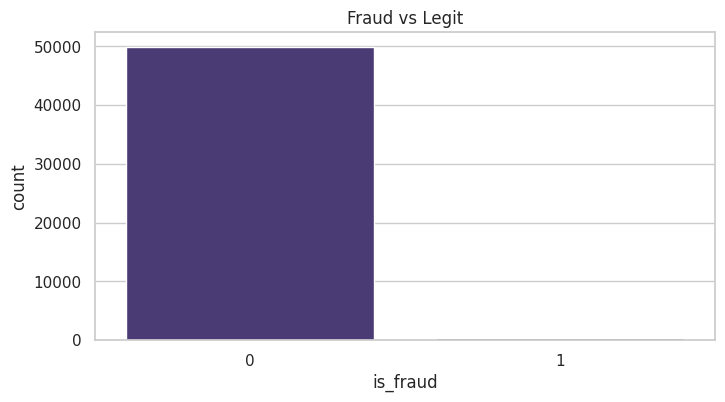

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [34]:
import os

# Create folder in Colab + repo path
os.makedirs("plots/day3", exist_ok=True)

# Function to save after each plot
def save_plot(filename):
    path = f"plots/day3/{filename}"
    plt.savefig(path, bbox_inches='tight')
    print(f"📁 Saved: {path}")

# Example usage while plotting:
plt.figure(figsize=(8,4))
sns.countplot(x='is_fraud', data=df_final)
plt.title("Fraud vs Legit")
save_plot("fraud_vs_legit.png")
plt.show()

# After making all plots and saving them:
!git config --global user.name "Anujgour22"
!git config --global user.email "Anujgour22@gmail.com"

# Make sure repo is clean before adding
!git status

# Add the Day 3 notebook and plots
!git add notebooks/day3_eda.ipynb plots/day3/*

# Commit changes
!git commit -m "Added Day 3 EDA notebook and saved plots"

# Push to GitHub
!git push origin main
